In [1]:
from ete3 import Tree
import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from physhapes.simulate import simulate_shapes
from physhapes.helper_functions import get_flat_values_sim


In [7]:
# load phylogeny 
tree = Tree('../data/chazot_subtree_rounded.nw')
print(tree)
# load root shape for simulation 
all_roots = np.genfromtxt('centroid_size_sim_wing.csv', delimiter=',')#np.genfromtxt('../data/hercules_forewing_n=20.csv', delimiter=',')
root = all_roots[0,:] #np.mean(all_roots, axis=0, keepdims=True)
np.savetxt('centroid_root_shape.csv', root, delimiter=',')


      /-niepelti
   /-|
  |   \-theseus
--|
  |   /-hercules
   \-|
     |   /-amphitryon
      \-|
         \-telemachus


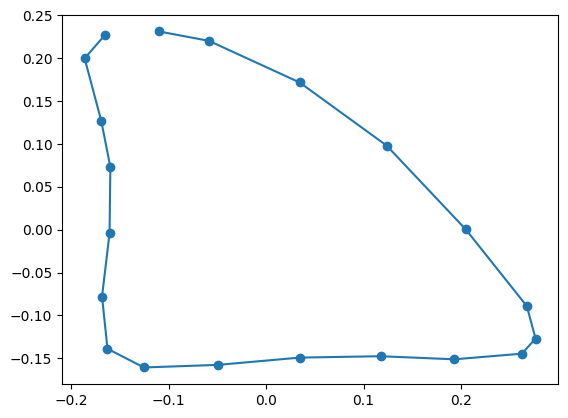

In [3]:
plt.plot(root[0::2], root[1::2], 'o-')

In [4]:
leafidx = []
inneridx = []
species = []
i = 0
for node in tree.traverse('levelorder'):
    if node.is_leaf():
        print(node.name)
        leafidx.append(i)
        species.append(node.name)
    else:
        inneridx.append(i)
    i+=1
print(leafidx)
print(inneridx)
print(species)

niepelti
theseus
hercules
amphitryon
telemachus
[3, 4, 5, 7, 8]
[0, 1, 2, 6]
['niepelti', 'theseus', 'hercules', 'amphitryon', 'telemachus']


In [5]:
n_datasets = 1
sigma = 0.3
alpha = 0.005
dt = 0.05
rb = 0

In [6]:
for i in range(n_datasets):
    ds = 1878350139#np.random.randint(0, 2**32)
    outputpath = f'sigma={sigma}_alpha={alpha}_dt={dt}/seed={ds}'
    os.makedirs(outputpath, exist_ok=True)
    print(f'Simulating dataset {i+1} out of {n_datasets} with seed {ds} ')
    simtree = simulate_shapes(ds=ds, dt=dt, sigma=sigma, alpha=alpha, root=root, tree=tree, rb=rb)
    flat_true_tree = np.array(get_flat_values_sim(simtree)) 
    np.savetxt(f'{outputpath}/flat_true_tree.csv', flat_true_tree, delimiter=",")
    [plt.plot(flat_true_tree[idx][0::2], flat_true_tree[idx][1::2], '--o', markersize=3, label='Simulated data') for idx in leafidx]
    plt.savefig(f'{outputpath}/simulated_leaves.pdf', bbox_inches='tight')  
    plt.close()
    
    leaves = pd.DataFrame(flat_true_tree[leafidx, :], index=species)
    #leaves.columns = [['X'+str(i), 'Y'+str(i)] for i in range(leaves.shape[1] // 2)]
    leaves.columns = [f'X{i}' if j % 2 == 0 else f'Y{i}' 
                  for i in range(leaves.shape[1] // 2) for j in range(2)]
    leaves.to_csv(f'{outputpath}/leaves.csv', index=False, header=False)
    flat_true_tree_df = pd.DataFrame(flat_true_tree)
    flat_true_tree_df.to_csv(f'{outputpath}/flat_true_tree.csv', index=False, header=False) 

Simulating dataset 1 out of 1 with seed 1878350139 
